In [5]:
# Data analysis & wrangling
import numpy as np # linear algebra
import pandas as pd # data processing
import random as rnd
import string
import requests
import re

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


from tqdm import tqdm
from collections import Counter
import nltk
from nltk.probability import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

from collections import Counter
from nltk.util import ngrams

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

import spacy
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [6]:
df = pd.read_csv('/Users/Varvara/spiced_working_files/final_project/NLP/reviews_full_text.csv')
df

,asin,text,title,location_and_date,verified,rating,negative or positive
0,B07HBDNGHC,Auf die Funktion der Box gehe ich nur kurz ein...,"Die Toniebox: sehr teuer, sehr geliebt",Reviewed in Germany on 10 October 2022,True,4.0,positive
1,B07HBDNGHC,Ich hielt die Toniebox immer für einen Überteu...,Neutrale Bewertung der Toniebox nach über eine...,Reviewed in Germany on 2 April 2020,False,4.0,positive
2,B07HBDNGHC,"Die Box ist ein hübsches Gerät, leider ist sie...","Schönes Teil, leider nicht so robust wie gedacht",Reviewed in Germany on 22 November 2022,True,5.0,positive
3,B07HBDNGHC,Hier muss ich einfach bewerten!!!Bin super zuf...,Toniebox ist einfach super,Reviewed in Germany on 21 November 2022,True,5.0,positive
4,B07HBDNGHC,Wir Lieben die toniebox. Sie ist mega praktisc...,100% Empfehlung,Reviewed in Germany on 28 November 2022,True,5.0,positive
...,...,...,...,...,...,...,...
5958,B000NJWLHS,"Super schnelle Lieferung ,hervorragende Qualit...",Tolles Weinachtsgescheng,Reviewed in Germany on 8 January 2022,True,5.0,positive
5959,B000NJWLHS,Unsere Enkeltochter hat es zum Geburtstag beko...,Super Geburtstagsgeschenk,Reviewed in Germany on 19 May 2021,True,5.0,positive
5960,B000NJWLHS,"Die Farben waren teilweise angetrocknet, so da...",Farben teilweise angetrocknet,Reviewed in Germany 🇩🇪 on 22 January 2021,True,3.0,positive
5961,B000NJWLHS,an Amazon: aus dem Programm nehmen!,"völlig ungeeignet,",Reviewed in Germany 🇩🇪 on 18 June 2020,True,1.0,positive


In [7]:
df['reviews']=df['text']+df['title']
df['reviews'][0]

'Auf die Funktion der Box gehe ich nur kurz ein, da die Toniebox doch sehr bekannt ist und das Prinzip sogar für einen 2 jährigen leicht verständlich ist.Die Box wurde schnell geliefert, gibt es in schönen Farben (beim starter Set mit kreativ Tonie), ist nicht zu groß, so das kleine Kinder es gut herumtragen können, ist Ummantelt mit leicht gefütterten robusten Stoff und somit recht robust und auch sicher für Kinder.Es hat 2 Ohren für laut und leise.Für das Einrichten wird WLan benötigt. Wird ein Tonie drauf gesetzt, spielt es direkt ab. Leuchtet es blau, so wird der Inhalt während dem abspielen herunter geladen. Grün bedeutet alles super und rot/Orange das die Batterie bald alle ist.Haut man seitlich auf die Box so kann man ein Kapitel vor oder zurück springen.Der Ton ist an sich okay bis gut aber nicht herausragend und für den hohen Preis gerade noch akzeptabel.Die Figuren dafür sind niedlich und werden ebenfalls gerne bespielt. Nachteil hier ist, dass die Farbe der Tonies bei uns St

Text cleaning

In [8]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('german')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Varvara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Varvara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
df['stopwords'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['reviews','stopwords']].head()

,reviews,stopwords
0,Auf die Funktion der Box gehe ich nur kurz ein...,163
1,Ich hielt die Toniebox immer für einen Überteu...,533
2,"Die Box ist ein hübsches Gerät, leider ist sie...",27
3,Hier muss ich einfach bewerten!!!Bin super zuf...,24
4,Wir Lieben die toniebox. Sie ist mega praktisc...,7


In [10]:

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

df['punctuation'] = df['reviews'].apply(lambda x: count_punct(x))

In [11]:
df[['reviews','punctuation']].head()

,reviews,punctuation
0,Auf die Funktion der Box gehe ich nur kurz ein...,43
1,Ich hielt die Toniebox immer für einen Überteu...,174
2,"Die Box ist ein hübsches Gerät, leider ist sie...",9
3,Hier muss ich einfach bewerten!!!Bin super zuf...,9
4,Wir Lieben die toniebox. Sie ist mega praktisc...,3


In [12]:
df['numerics'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['reviews','numerics']].head()

,reviews,numerics
0,Auf die Funktion der Box gehe ich nur kurz ein...,3
1,Ich hielt die Toniebox immer für einen Überteu...,6
2,"Die Box ist ein hübsches Gerät, leider ist sie...",1
3,Hier muss ich einfach bewerten!!!Bin super zuf...,1
4,Wir Lieben die toniebox. Sie ist mega praktisc...,0


In [13]:
df['upper'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['reviews','upper']].head()

,reviews,upper
0,Auf die Funktion der Box gehe ich nur kurz ein...,0
1,Ich hielt die Toniebox immer für einen Überteu...,7
2,"Die Box ist ein hübsches Gerät, leider ist sie...",0
3,Hier muss ich einfach bewerten!!!Bin super zuf...,0
4,Wir Lieben die toniebox. Sie ist mega praktisc...,0


In [14]:
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['reviews'].head()

0    auf die funktion der box gehe ich nur kurz ein...
1    ich hielt die toniebox immer für einen überteu...
2    die box ist ein hübsches gerät, leider ist sie...
3    hier muss ich einfach bewerten!!!bin super zuf...
4    wir lieben die toniebox. sie ist mega praktisc...
Name: reviews, dtype: object

In [15]:
df['reviews'] = df['reviews'].str.replace('[^\w\s]','')
df['reviews'].head()

0    auf die funktion der box gehe ich nur kurz ein...
1    ich hielt die toniebox immer für einen überteu...
2    die box ist ein hübsches gerät leider ist sie ...
3    hier muss ich einfach bewertenbin super zufrie...
4    wir lieben die toniebox sie ist mega praktisch...
Name: reviews, dtype: object

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['reviews'].sample(10)
     

2530    produkt war ein voller erfolg das herstellen d...
3448    habe das spielzeug meinen enkel verschenkt war...
4163    das produkt selbst wurde intakt geliefert jedo...
2395    kam gut und alles hat eigentlich gepasst bis a...
4515    kann über das spiel noch nichts sagen aber das...
2702       ein lustiges spiel für die ganze familielustig
5896    bought birthday gift granddaughter started 1pm...
1140    leider ist die platte sehr klein und lässt sic...
1294    falsches produkt es ist ein adventskalender ba...
2034    der planet jupiter fehlte der verpackungravens...
Name: reviews, dtype: object

In [17]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [18]:
# remove all emojis from df
df['reviews'] = df['reviews'].apply(lambda x: remove_emoji(x))

In [20]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 4.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
from textblob import TextBlob
df['reviews'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    au die function der box gene ich nur kuz ein d...
1    ich hilt die toniebox summer for linen überteu...
2    die box ist ein hübsches great leader ist she ...
3    her muss ich einfach bewertenbin super zufried...
4    war listen die toniebox she ist meg praktisch ...
Name: reviews, dtype: object

In [22]:
freq = pd.Series(' '.join(df['reviews']).split()).value_counts()[:20]
freq

die      8547
und      8474
ist      6047
das      5468
der      5149
es       4837
nicht    4272
für      3585
zu       3496
ich      3482
man      3186
auch     2991
ein      2877
mit      2614
den      2578
sehr     2552
aber     2526
spiel    2053
sich     1946
sind     1845
dtype: int64

Feature extraction

In [24]:
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split(" ")))
df[['reviews','word_count']].head()

,reviews,word_count
0,auf die funktion der box gehe ich nur kurz ein...,352
1,ich hielt die toniebox immer für einen überteu...,1135
2,die box ist ein hübsches gerät leider ist sie ...,57
3,hier muss ich einfach bewertenbin super zufrie...,56
4,wir lieben die toniebox sie ist mega praktisch...,24


In [25]:
null_values=df.isna().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot*100
round(null_values,3).sort_values('percent',ascending=False)

,null,percent
asin,0,0.0
text,0,0.0
title,0,0.0
location_and_date,0,0.0
verified,0,0.0
rating,0,0.0
negative or positive,0,0.0
reviews,0,0.0
stopwords,0,0.0
punctuation,0,0.0


In [26]:
# number of characters
df['char_count'] = df['reviews'].str.len() ## this also includes spaces
df[['reviews','char_count']].head()

,reviews,char_count
0,auf die funktion der box gehe ich nur kurz ein...,2108
1,ich hielt die toniebox immer für einen überteu...,7647
2,die box ist ein hübsches gerät leider ist sie ...,333
3,hier muss ich einfach bewertenbin super zufrie...,334
4,wir lieben die toniebox sie ist mega praktisch...,159


In [27]:
#average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/(len(words)+0.000001))

In [28]:
df['avg_word'] = df['reviews'].apply(lambda x: avg_word(x)).round(1)
df[['reviews','avg_word']].head()

,reviews,avg_word
0,auf die funktion der box gehe ich nur kurz ein...,5.0
1,ich hielt die toniebox immer für einen überteu...,5.7
2,die box ist ein hübsches gerät leider ist sie ...,4.9
3,hier muss ich einfach bewertenbin super zufrie...,5.0
4,wir lieben die toniebox sie ist mega praktisch...,5.7


In [29]:
df.sample(2)

,asin,text,title,location_and_date,verified,rating,negative or positive,reviews,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word
629,B01HRY7K3G,Das Spiel wurde uns im Urlaub empfohlen und wi...,Spiel mit Suchtfaktor,Reviewed in Germany on 13 November 2022,True,5.0,positive,das spiel wurde uns im urlaub empfohlen und wi...,23,15,0,0,61,371,5.1
3983,B097PGCV99,Wir haben uns beim Spielen teilweise vor lache...,So ein lustiges Spiel :-),Reviewed in Germany on 20 September 2022,True,5.0,positive,wir haben uns beim spielen teilweise vor lache...,10,7,0,0,28,170,5.1


In [30]:
pip install datefinder

Note: you may need to restart the kernel to use updated packages.


In [31]:
text_date=df['location_and_date'].astype(str)
text_date

0          Reviewed in Germany on 10 October 2022
1             Reviewed in Germany on 2 April 2020
2         Reviewed in Germany on 22 November 2022
3         Reviewed in Germany on 21 November 2022
4         Reviewed in Germany on 28 November 2022
                          ...                    
5958        Reviewed in Germany on 8 January 2022
5959           Reviewed in Germany on 19 May 2021
5960    Reviewed in Germany 🇩🇪 on 22 January 2021
5961       Reviewed in Germany 🇩🇪 on 18 June 2020
5962         Reviewed in Italy 🇮🇹 on 7 March 2022
Name: location_and_date, Length: 5963, dtype: object

In [32]:
import datefinder
def get_date():
  string_with_dates = text
  matches = datefinder.find_dates(string_with_dates)
  for match in matches:
    print(match)

In [ ]:
#df['location_and_date'].apply(get_date)

In [33]:
df= df.drop(columns=['text', 'title', 'location_and_date', 'verified','negative or positive'], axis= 1)

In [ ]:
df.to_csv('Amazon_reviews_processed.csv', index=False)

Visualization

In [34]:
df.describe().round(0)

,rating,stopwords,punctuation,numerics,upper,word_count,char_count,avg_word
count,5963.0,5963.0,5963.0,5963.0,5963.0,5963.0,5963.0,5963.0
mean,4.0,21.0,9.0,0.0,0.0,53.0,343.0,6.0
std,1.0,37.0,19.0,1.0,1.0,86.0,561.0,1.0
min,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,3.0,3.0,2.0,0.0,0.0,12.0,85.0,5.0
50%,4.0,10.0,4.0,0.0,0.0,27.0,176.0,6.0
75%,5.0,24.0,10.0,0.0,0.0,57.0,368.0,6.0
max,5.0,548.0,600.0,36.0,27.0,1322.0,8845.0,28.0


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

Distribution of stopwords values

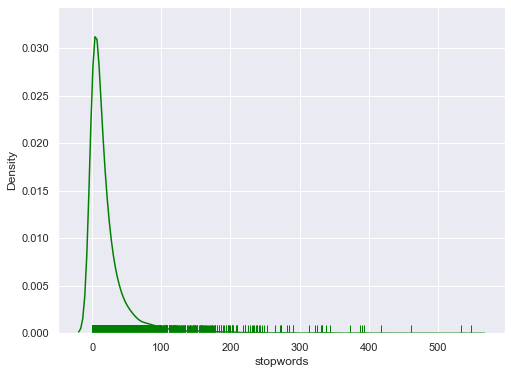

In [36]:
plt.figure(figsize=(8, 6))
sns.distplot(df.stopwords, rug=True, hist=False, color = 'green');

In [37]:
df.loc[df.stopwords >= 500].reviews

1       ich hielt die toniebox immer für einen überteu...
5074    vorwortda ich eher ungerne obst esse aber weiß...
Name: reviews, dtype: object

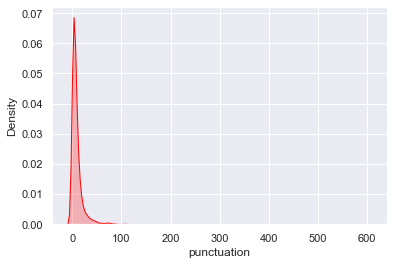

In [38]:
sns.kdeplot(df.punctuation,shade=True, color = 'red');

In [39]:
# Let's check reviews punctuation > 200
df.loc[df.punctuation >= 200].reviews.tolist()

['auf der suche nach einem neuen spiel damals zum valentinstag bin ich auf skyjo action gestoßen und habe mich aufgrund der guten bewertungen für das spiel entschieden ich bzw meine ganze familie haben es absolut nicht bereut denn das spiel ist echt toll kurzfazit es ist ein sehr leicht zu erlernendes unglaublich tolles spiel bei dem man versuchen muss wenig punkte wie möglich zu sammeln durch dieses skyjo action kann man zum einen das normale skyjo spielen indem man die actionkarten weglässt aber auch sehr viel mit den actionkarten variieren indem man einige davon rauslässt zb die angriffskarten oder diese statt einem separaten actionkartenstapel den normalen kartenstapel mit einmischtwir haben das spiel bisher mehrfach gekauft für uns und für die familie und werden es noch öfters kaufen um es freunde zu verschenken ein ideales geschenk 15 ist nicht super günstig aber ein doch recht angemessener preis ausführliche rezension zuerst mit das beste man kann mit diesem spiel auch das norma

In [40]:
df.loc[df.word_count <=3].reviews

45                    alles okalles ok
64                                okok
133     terrible device limiteduseless
141                         supersuper
143                               okok
                     ...              
5885                            gutgut
5894         hahahaha lächerlichhahaha
5898             tolles geschenkspitze
5899               super geschenkdanke
5949                         smallsize
Name: reviews, Length: 348, dtype: object

In [41]:
# drop duplicates
df= df.drop_duplicates(subset=['reviews'])

In [42]:
df.shape

(5879, 10)

In [43]:
df.loc[df.punctuation >= 100].reviews.shape

(34,)

In [44]:
df.loc[df.punctuation >= 100].reviews.tolist()

['ich hielt die toniebox immer für einen überteuerten lautsprecher mit überteuerter musikhörbuch softwareirgendwann habe ich mich dann doch dazu entschlossen unserer kleinen eine box zu kaufen nun ist die toniebox bei uns seit über einem jahr im einsatz und ich möchte allen interessenten hier meine erfahrungen mit der toniebox teilenfür alle die sich für das teil interessieren habe ich eine kleine zusammenstellung gemacht und unten gibt es dann eine kurze liste mit vor und nachteilen wie mein persönliches fazitnatürlich gbt es neben der toniebox viele alternativen welche deutlich günstiger sind aber bei der toniebox haben die bespielbaren figuren einen gewissen mehrwertich verstehe aber jeden der seinem kind einen kassettenspieler mit alten hörspielkasetten kauft oder einn mp3 player mit geschichten bespieltwas ist die tonieboxdie toniebox ist ein lautsprecher mit einer nfc schnittstelle auf dieser werden die separat erhältlichen toniefiguren draufgestellt und die hörspielelieder werde

In [45]:
df.loc[df.word_count >=100].reviews

0       auf die funktion der box gehe ich nur kurz ein...
1       ich hielt die toniebox immer für einen überteu...
7       hab die toniebox für meine kindergartenkinder ...
10      wenn man sich mittlerweile im bekanntenkreis u...
13      zu aller erst der händler bei dem wir die box ...
                              ...                        
5910    positiv konzentration wird gefördert mein sohn...
5913    also meine tochter hätte es mit 8 jahren allei...
5914    die idee ist echt super auch dass es verschied...
5920    heute kam die tonie mit den tierliedern und wu...
5950    enthalten ist folgendes 15 töpfchen matt trock...
Name: reviews, Length: 744, dtype: object

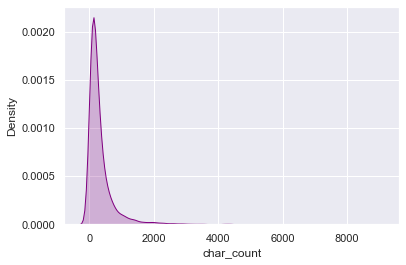

In [46]:
sns.kdeplot(df.char_count,shade=True, color = 'purple');

In [47]:
df.loc[df.char_count >= 200].reviews.shape

(2726,)

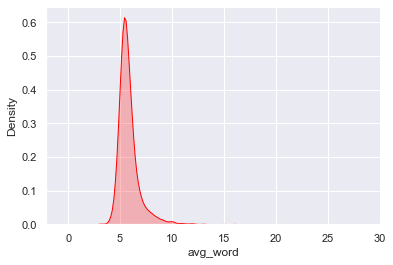

In [48]:
sns.kdeplot(df.avg_word,shade=True, color = 'red');

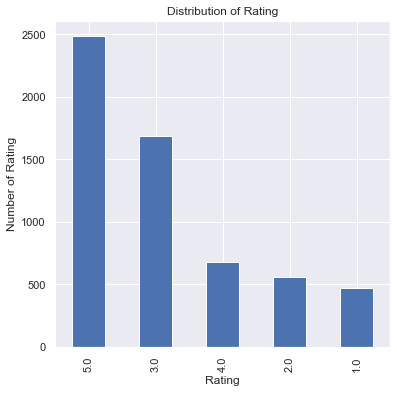

In [50]:
#distribution of rating
df.rating.value_counts(ascending = False).plot(kind= 'bar', figsize= (6,6))
plt.xlabel("Rating")
plt.ylabel('Number of Rating')
plt.title('Distribution of Rating');

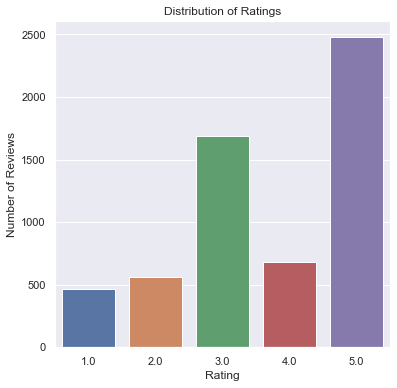

In [52]:
a = df.groupby(['rating'])['asin'].count()
a = a.reset_index()
a = a.rename(columns={'asin': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='rating', y='Number of Reviews', data=a)
plt.xlabel("Rating")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings');

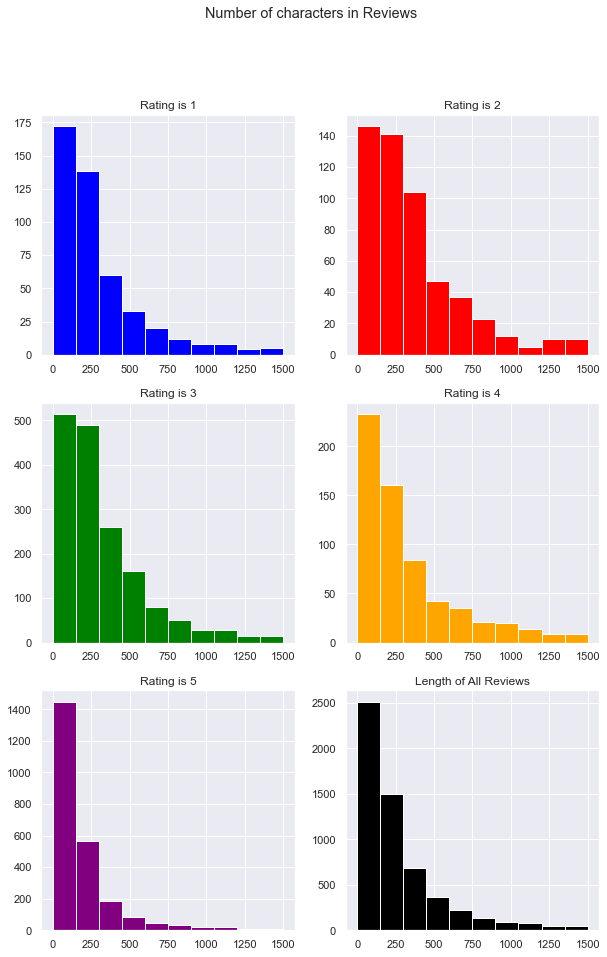

In [53]:
# number of characters in reviews
fig, axs = plt.subplots(3,2, figsize=(10, 15))

#Rating 1
review_len = df.loc[df['rating']==1]['reviews'].str.len()
axs[0,0].hist(review_len, color='blue', range=(0,1500))
axs[0,0].set_title('Rating is 1')

#Rating 2
review_len = df.loc[df['rating']==2]['reviews'].str.len()
axs[0,1].hist(review_len, color='red',range=(0,1500))
axs[0,1].set_title('Rating is 2')

#Rating 3
review_len = df.loc[df['rating']==3]['reviews'].str.len()
axs[1,0].hist(review_len, color='green', range=(0,1500))
axs[1,0].set_title('Rating is 3')

#Rating 4
review_len = df.loc[df['rating']==4]['reviews'].str.len()
axs[1,1].hist(review_len, color='orange', range=(0,1500))
axs[1,1].set_title('Rating is 4')


#Rating 5
review_len = df.loc[df['rating']==5]['reviews'].str.len()
axs[2,0].hist(review_len, color='purple', range=(0,1500))
axs[2,0].set_title('Rating is 5')

#All Scores
review_len = df['reviews'].str.len()
axs[2,1].hist(review_len, color='black', range=(0,1500))
axs[2,1].set_title('Length of All Reviews')


fig.suptitle('Number of characters in Reviews')

plt.show()

Convert 'rating' to a binary feature

In [54]:
df['Good_reviews']= df.rating
df.Good_reviews[df.rating <= 3] = 0
df.Good_reviews[df.rating >= 4] = 1

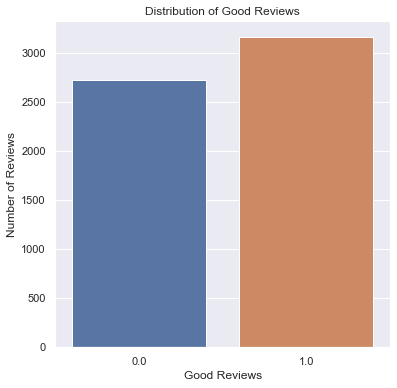

In [55]:
a = df.groupby(['Good_reviews'])['asin'].count()
a = a.reset_index()
a = a.rename(columns={'asin': 'Number of Reviews'})
fig, ax = plt.subplots(figsize=(6, 6))

sns.barplot(x='Good_reviews', y='Number of Reviews', data=a)
plt.xlabel("Good Reviews")
plt.ylabel('Number of Reviews')
plt.title('Distribution of Good Reviews');

In [56]:
df.Good_reviews.sample(10)

3448    1.0
2475    0.0
2180    1.0
4512    1.0
2348    1.0
5387    0.0
5465    0.0
2799    0.0
5134    1.0
3620    1.0
Name: Good_reviews, dtype: float64

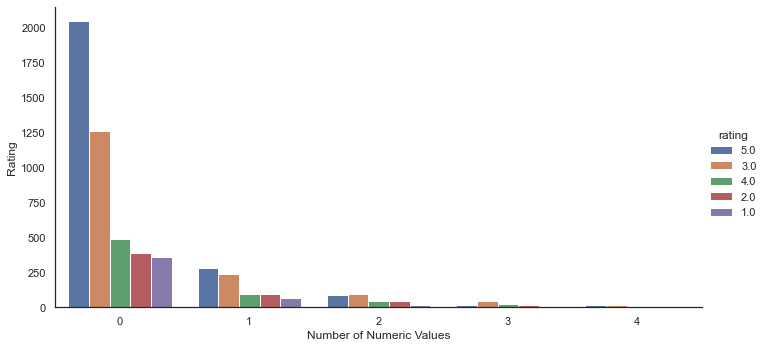

In [57]:
with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df.loc[df.numerics <= 4], aspect= 2, kind='count', 
                    hue='rating', hue_order=df['rating'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Rating')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')

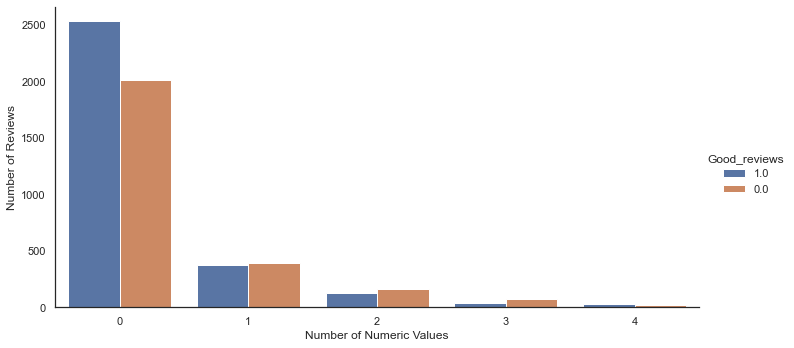

In [58]:
with sns.axes_style('white'):
    g = sns.catplot( 'numerics', data= df.loc[df.numerics <= 4], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index)
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Numeric Values')
    g.set_titles('Distrubition of Number of Numeric values for Reviews')

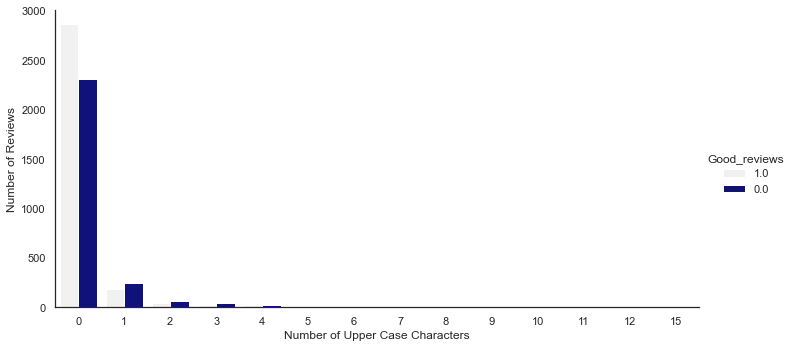

In [59]:
with sns.axes_style('white'):
    g = sns.catplot( 'upper', data= df.loc[df.upper <= 15], aspect= 2, kind='count', 
                    hue='Good_reviews', hue_order=df['Good_reviews'].value_counts().sort_values(ascending=False).index, color= 'DarkBlue')
    g.set_ylabels('Number of Reviews')
    g.set_xlabels('Number of Upper Case Characters')
    g.set_titles('Distrubition of Number of Upper Case Characters for Reviews')
     

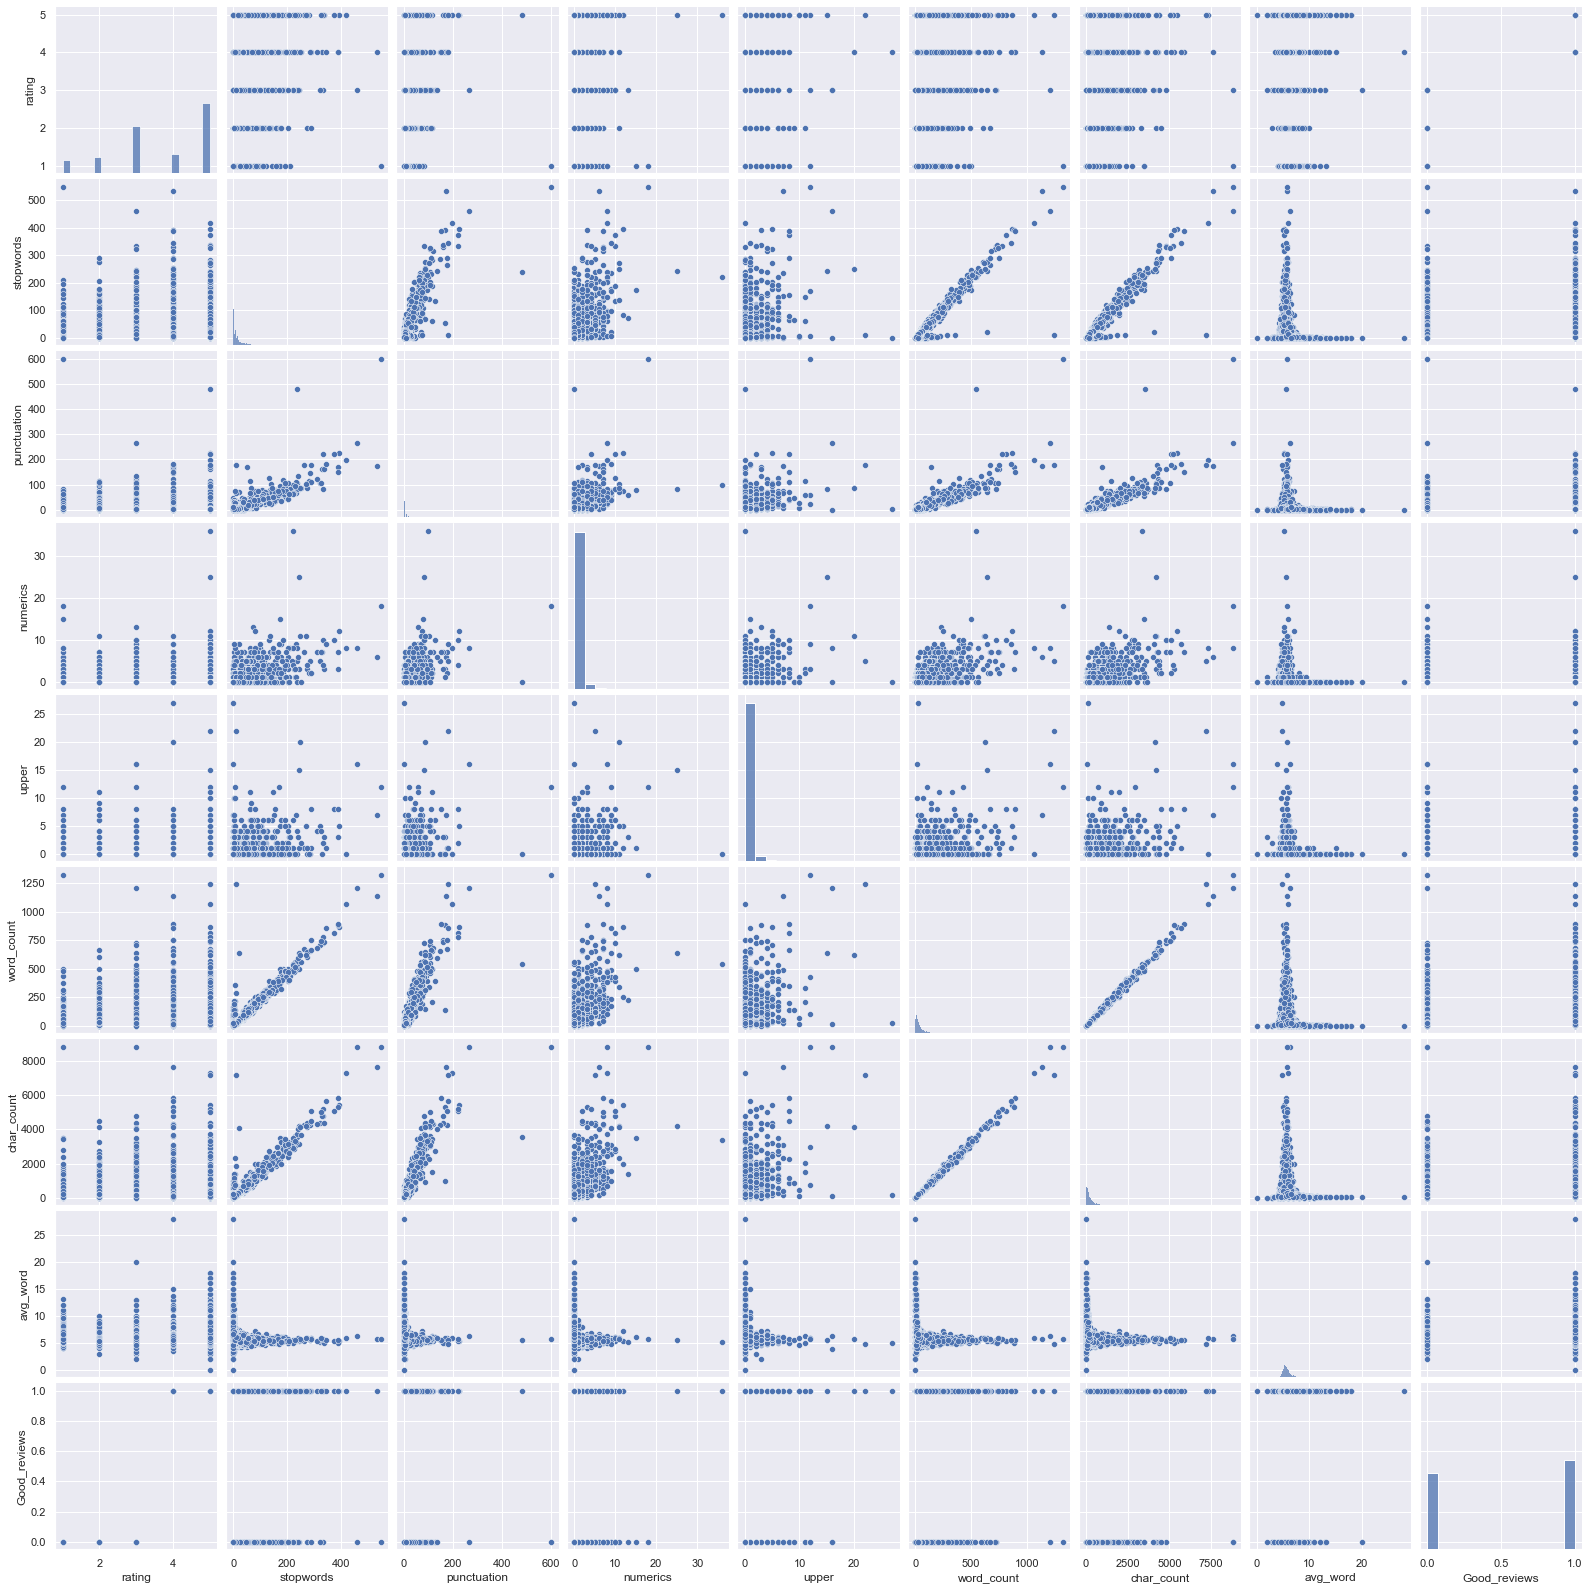

In [61]:
sns.pairplot(df);

In [125]:
df.to_csv('Amazon_reviews_cleaned_finalform.csv', index=False)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [63]:
nltk.download('punkt')
nltk.download('stopwords')

stemmer = SnowballStemmer("german")
stop_words = set(stopwords.words("german"))


def clean_text(text, for_embedding=False):
    """
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>")
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    RE_EMOJI = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)
    text = re.sub(RE_EMOJI, " ", text)
  
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [
            stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
        ]

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /Users/Varvara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
df['reviews'] = df['reviews'].astype(str)
df['reviews'] = df['reviews'].apply(clean_text)
# Drop when any of x missing
df["grade_bad"] = 0
df.loc[df["rating"] >= 3, "grade_bad"] = np.NaN
df.loc[df["rating"] >= 5, "grade_bad"] = 1

# Drop when any of x missing
df = df[(df["reviews"] != "") & (df["reviews"] != "null")]

df = df.dropna(
    axis="index", subset=["grade_bad", "reviews", "reviews"]
).reset_index(drop=True)

In [66]:
!pip install langdetect
from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
df['lang'] = df.reviews.progress_map(detect)
df = df.loc[df.lang=='en']

0it [00:00, ?it/s]

  0%|          | 0/3508 [00:00<?, ?it/s]

In [67]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Varvara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Varvara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Varvara/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [68]:
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
df.reviews[:20]

21     less one month becam dry good quality friend b...
41                                 toni offendi toni off
89                          terribl devic limiteduseless
131    gern kind tablet schenck einfach az tip topkin...
132    sohn diplay kaputt jahr garanti tausch hilft h...
156    lego marvel mag groot find ichsup bau macht re...
159    son learned new building method building head ...
160    groot whatev suppoused bearly stand still even...
162    product great shipping terribl put pap back bo...
165    disappointedmissing vital part toward end buil...
198                                             schonall
202              toll figur toll geschicht liebling sohn
203                                           topall top
215                 schon spiel toll verpack schon spiel
303    toll spiel kind spass macht toll qualitat spas...
307    abl mak big box already hadth childr enjoy muc...
314    thing product rais temp poorly designed certai...
325    keeps child focused mak 

In [73]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

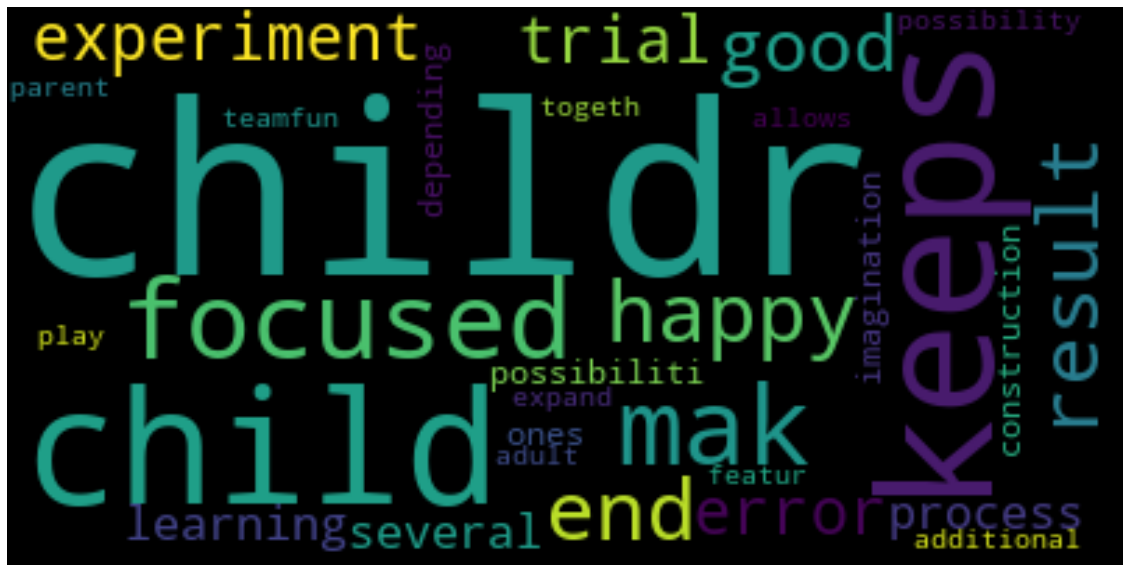

In [92]:
# for one review:
abc = df.reviews[325]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(abc)

# Display the generated image:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('cloud1.png')
plt.show()

In [82]:
df['reviews']= df['reviews'].astype(str)

In [83]:
#Word cloud for the all reviews
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_for_cloud = " ".join(x for x in df.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 21885 words in the combination of all reviews.


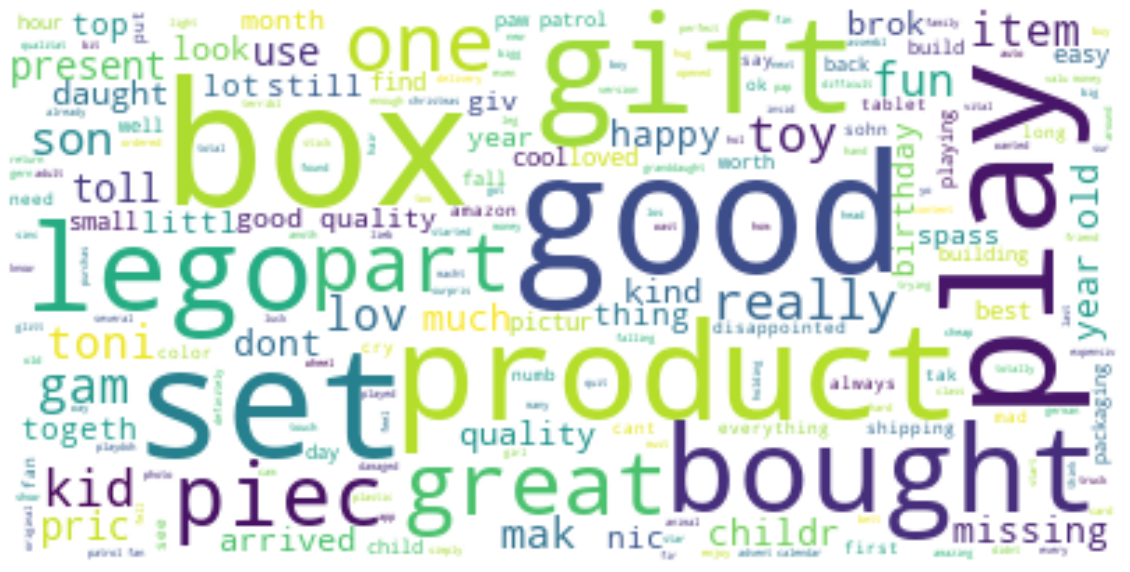

In [90]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["da","zu","auf","man", "e", "den", "spiel","und","auch","für", "mit", 
                  "ein","eine","wie", "die", "der", "ist", "sind", "oder", "aber", "das", "alle", "nicht", "war", 
                  "kann",'die','und','ist','das','der','es','nicht','für','zu','ich','man','auch','ein','mit','den','sehr',
                  'aber','spiel','sich','sind','hat','auf','eine','wir','von','kann','nur','gut','bei','war','haben','dem',
                  'als','dass', 'da','wie', 'sie', 'noch','leider', 'im', 'zum', 'schon','wenn','nach','kinder','aus','oder',
                  'habe','dann','viel', 'sup','lik','tim'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (20,20))
dpi= 100
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('cloud_reviews.png')
plt.show()

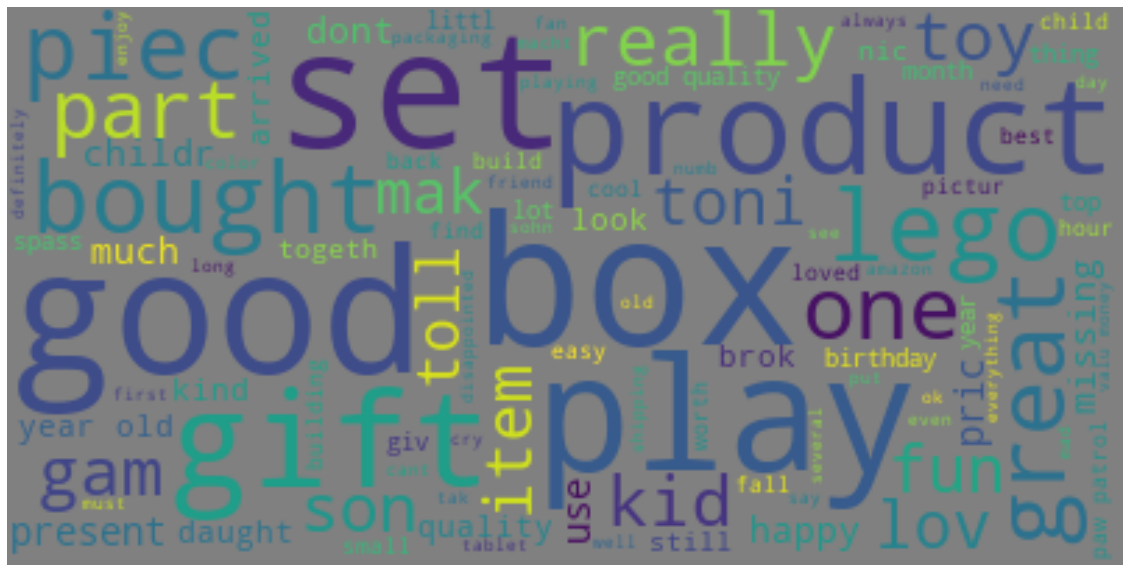

In [94]:

wordcloud = WordCloud(stopwords=stopwords, background_color="grey", max_words= 100).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('cloud_reviews_grey.png')
plt.show()

In [95]:
freq = pd.Series(' '.join(df['reviews']).split()).value_counts()[:50]
freq

good        42
box         35
set         28
play        27
product     26
gift        26
lik         22
sup         22
lego        22
tim         22
bought      22
year        21
great       21
quality     21
piec        20
part        19
really      19
would       18
old         17
one         17
kid         17
gam         17
son         16
schon       15
lov         15
toni        15
fun         15
item        15
get         14
mak         14
present     13
pric        13
toll        13
toy         12
dont        12
use         12
happy       12
missing     12
much        12
childr      12
look        11
brok        11
daught      11
kind        11
arrived     11
top         10
togeth      10
money       10
birthday    10
still       10
dtype: int64